<a href="https://colab.research.google.com/github/imymemineyay/Study_Python/blob/main/Python_dojang(Unit36_37).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Unit 36. 클래스 상속 사용하기**

클래스 상속 : 물려받은 기능을 유지한채로 다른 기능을 추가할 때 사용하는 기능

기반 클래스 : 기능을 물려주는 클래스

파생 클래스 : 상속을 받아 새롭게 만드는 클래스 

- 재사용함에 있어 효율적

        class 기반클래스이름:
            코드
 
        class 파생클래스이름(기반클래스이름):
            코드

In [1]:
class Person:
  def greeting(self):
    print('안녕하세요')
  
class Student(Person): # 기반 클래스 상속
  def study(self):
    print('공부하기')

james = Student() 
james.greeting() # 안녕하세요.: 기반 클래스 Person의 메서드 호출
james.study() # 공부하기: 파생 클래스 Student에 추가한 study 메서드

안녕하세요
공부하기


<참고>

상속 관계 확인하기

        issubclass(파생클래스, 기반클래스)

In [2]:
class Person:
  pass

class Student(Person):
  pass

issubclass(Student, Person)

True

36.2 상속 관계

- 상속은 명확하게 같은 종류이며 동등한 관계일 때 사용
- 상속 관계를 영어로 is-a관계라고 부름 

ex) Student is a Person

In [3]:
class Person:
  def greeting(self):
    print('hi')

class Student(Person):
  def study(self):
    print('study hard')

사람 목록을 관리하는 클래스 생성법

- 리스트 속성에 Person인스턴스를 넣어서 관리
- 상속을 사용하지 않고 속성에 인스턴스를 넣어서 관리하므로 PersonList가 Person을 포함함
- PersonList 와 Person은 동등한 관계가 아니라 포함 관계
- has-a관계 

PersonList has a Person

📢🎯 같은 종류에 동등한 관계일 때는 상속을 사용하고, 그 이외에는 속성에 인스턴스를 넣는 포함 방식을 사용하면 됨

In [4]:
class Person:
  def greeting(self):
    print('hi')
class PersonList:
  def  __init__(self):
    self.person_list = []
  
  def append_person(self,person): # 리스트 속성에 Person인스턴스를 추가하는 함수
    self.person_list.append(person)

In [5]:
class Person:
  def __init__(self):
    print('Person__init__')
    self.hello = 'hi'

class Student(Person):
  def __init__(self):
    print('Student __init__')
    self.school = 'python coding dojang'

james = Student()
print(james.school)
print(james.hello) # 기반 클래스의 속성을 출력하려고 하면 에러가 발생

Student __init__
python coding dojang


AttributeError: ignored

- super()로 기반 클래스 초기화

: super()를 사용해서 기반 클래스의 __init__ 메서드 호출
     
      super().메서드()


In [8]:
class Person:
  def __init__(self):
    print('Person __init__')
    self.hello = 'hi'

class Student(Person):
  def __init__(self):
    print('Student __init__')
    super().__init__()
    self.school = 'python coding dojang'

james = Student()
print(james.school)
print(james.hello)

Student __init__
Person __init__
python coding dojang
hi


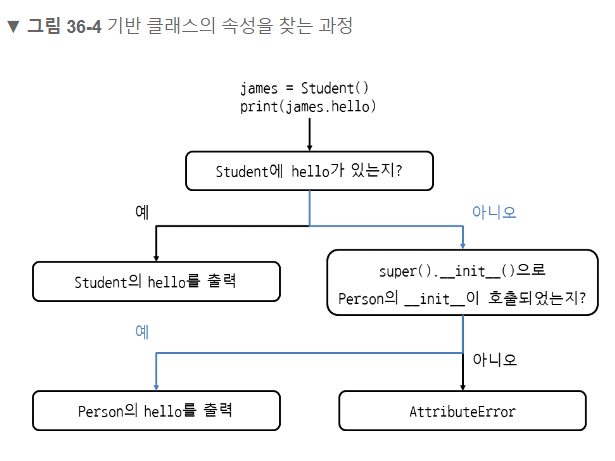

- 기반 클래스를 초기화하지 않아도 되는 경우

파생 클래스에서 __init__ 메서드를 생략한다면 기반 클래스의 __init__ 이 자동으로 호출되므로 super()는 사용하지 않아도 됨

▶ 파생 클래스에 __init__ 메서드가 없다면 기반 클래스의 __init__이 자동으로 호출되므로 기반 클래스의 속성 사용 가능

In [10]:
class Person:
  def __init__(self):
    print('Person__init__')
    self.hello = 'hi'

class Student(Person):
  pass

james = Student()
print(james.hello)

Person__init__
hi


<참고> 좀 더 명확하게 super 사용

super : 파생 클래스와 self를 넣어서 현재 클래스가 어떤 클래스인지 명확하게 표시하는 방법도 가지고 있음

      super(파생클래스, self).메서드

In [12]:
class Student(Person):
  def __init__(self):
    print('Student__init__')
    super(Student,self).__init__() # super(파생클래스,self) 로 기반 클래스의 메서드 호출
    self.school = 'python coding dojang'

36.4 메서드 오버라이딩 사용하기

오버라이딩 

: 무시하다, 우선하다

: 기반 클래스의 메서드를 무시하고 새로운 메서드를 만든다는 뜻

- 프로그램에서 어떤 기능이 같은 메서드 이름으로 계속 사용되어야 할 때 메서드 오버라이딩 활용

- 원래 기능을 유지하면서 새로운 기능을 덧붙일 때 사용


In [15]:
class Person:
    def greeting(self):
        print('안녕하세요.')
 
class Student(Person):
    def greeting(self):
        print('안녕하세요. 저는 파이썬 코딩 도장 학생입니다.')
 
james = Student()
james.greeting() # Person의 greeting을 무시하고 Student의 greeting 사용
                 # Person greeting 메서드와 Student 클래스의 greeting메서드
                 # '안녕하세요' 문구 중복을 기반 클래스의 메서드를 재활용함으로써
                 # 중복 줄일 수 있음
                 # 오버라이딩된 메서드에서 super()로 기반 클래스의 메서드를 호출

안녕하세요. 저는 파이썬 코딩 도장 학생입니다.


In [16]:
class Person:
  def greeting(self):
    print('hi')

class Student(Person):
  def greeting(self):
    super().greeting() # 기반 클래스의 메서드 호출하여 중복을 줄임
    print('저는 파이썬 코딩 도장 학생입니다.')

james = Student()
james.greeting()

hi
저는 파이썬 코딩 도장 학생입니다.


36.5 다중 상속 사용하기

- 여러 기반 클래스로부터 상속을 받아서 파생 클래스를 만드는 방법

        class 기반클래스이름1:
            코드
        class 기반클래스이름2:
            코드
        class 기반클래스이름3:
            코드

In [17]:
class Person:
  def greeting(self):
    print('hi')

class University:
  def manage_credit(self):
    print('GPA Management')

class Undergraduate(Person, University): # 두 기반 클래스의 기능을 모두 상속 받음
  def study(self):
    print('studying')

james = Undergraduate()
james.greeting()
james.manage_credit()
james.study()

hi
GPA Management
studying


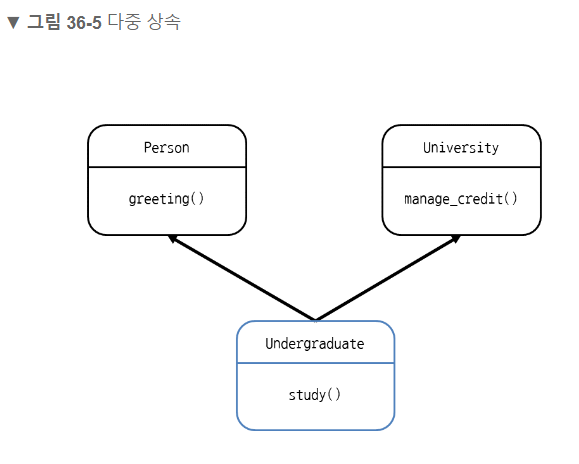

- 다이아몬드 상속

In [20]:
class A :
  def greeting(self):
    print('hi, i am A')

class B(A) :
  def greeting(self):
    print('hi, i am B')

class C(A) :
  def greeting(self):
    print('hi, i am C')

class D(B,C) :
  pass

x = D()
x.greeting()


hi, i am B


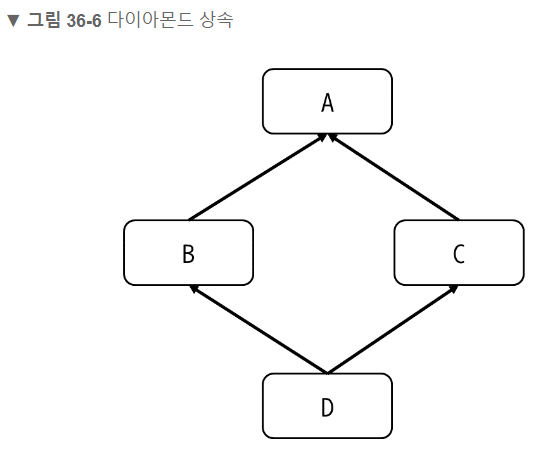

- 메서드 탐색 순서 확인

: 메서트 탐색 순서를 따라 다이아몬드 상속의 문제를 해결한다.

        클래스.mro()

In [21]:
D.mro() # D의 메서드가 없으니 B 메서드를 우선으로 사용

[__main__.D, __main__.B, __main__.C, __main__.A, object]

- 파이썬은 다중 상속을 한다면 클래스의 목록 중 왼쪽에서 오른쪽 순서로 메서드를 찾음

<참고>

object 클래스

파이썬에서 object는 모든 클래스의 조상
int의 MRO를 출력해보면 int 자시자신과 object가 출력됨

파이썬 3 에서 모든 클래스는 object클래스를 상속받으므로 기본적으로 object 생략

In [22]:
int.mro()

[int, object]

36.6 추상 클래스 사용하기

추상 클래스 

: 메서드의 목록만 가진 클래스이며 상속받은 클래스에서 메서드 구현을 강제하기 위해 사용

        from abc import *
 
        class 추상클래스이름(metaclass=ABCMeta):
            @abstractmethod
            def 메서드이름(self):
                코드

In [23]:
from abc import *

class StudentBase(metaclass=ABCMeta):
  @abstractmethod
  def study(self):  # 추상 클래스 StudentBase에서는 추상 메서드로 study와 go_to_school을 정의
    pass
  
  @abstractmethod
  def go_to_school(self):
    pass

class Student(StudentBase):
  def study(self): # study 메서드만 구현, 추상 클래스를 상속받았다면
    print('study') # @abstractmethod가 붙은 추상 메서드를 모두 구현해야함
                   # def go_to_school(self)도 추가해줘야 함

james = Student()
james.study

TypeError: ignored

In [24]:
from abc import *

class StudentBase(metaclass=ABCMeta):
  @abstractmethod
  def study(self): # 학생이 반드시 해야 하는 일을 추상 메서드로 만듦
    pass
  
  @abstractmethod
  def go_to_school(self):
    pass

class Student(StudentBase):
  def study(self): # 모든 추상 메서드를 구현하여 학생 클래스 작성
    print('study')
  def go_to_school(self): # 추상 클래스는 파생 클래스가 반드시 구현해야 하는 메서드를
                          # 정해 줄 수 있음
    print('go to school')

james = Student()
james.study()
james.go_to_school()

study
go to school


- 추상 클래스 : 파생 클래스가 반드시 구현해야 하는 메서드를 정해줄 수 있음
- 추상 클래스의 추상 메서드를 모두 구현했는지 확인하는 시점은 파생 클래스가 인스턴스를 만들 때이다. (james = Student()에서 확인)

추상 메서드를 빈 메서드로 만드는 이유

- 추상 클래스는 인스턴스로 만들 수 없음
- 그래서 추상 메서드를 만들 때 pass만 넣어 빈 메서드로 만든 것
- 추상 클래스는 인스턴스를 만들 수 없으니 추상 메서드도 호출할 일 없음

🎯🎯📢📢🔔🔔

추상 클래스는 인스턴스로 만들 때는 사용하지 않으며 오로지 상속에만 사용한다.

파생 클래스에서 반드시 구현해야 할 메서들르 정해 줄 때 사용한다.


In [26]:
class AdvancedList(list):

  def replace(self,old,new):
    while old in self:
      self[self.index(old)] = new


x = AdvancedList([1, 2, 3, 1, 2, 3, 1, 2, 3])
x.replace(1, 100)
print(x)

[100, 2, 3, 100, 2, 3, 100, 2, 3]


연습문제)

다음 소스 코드에서 동물 클래스 Animal과 날개 클래스 Wing을 상속받아 새 클래스 Bird를 작성하여 '먹다', '파닥거리다', '날다', True, True가 각 줄에 출력되게 만드세요.

In [27]:
class Animal:
    def eat(self):
        print('먹다')
 
class Wing:
    def flap(self):
        print('파닥거리다')

class Bird(Animal, Wing):
  def fly(self):
    print('날다')
    
b = Bird()
b.eat()
b.flap()
b.fly()
print(issubclass(Bird, Animal))
print(issubclass(Bird, Wing))

먹다
파닥거리다
날다
True
True


Unit 37. 두 점 사이의 거리 구하기

37.1 두 점 사이의 거리 구하기

- 클래스로 점 구현하기

In [29]:
class Point2D:
  def __init__(self,x,y): # 클래스로 점 두 개 만듦
    self.x = x
    self.y = y

p1 = Point2D(x=30,y=20)
p2 = Point2D(x=60, y=50)

print('p1 : {} {}'. format(p1.x,p1.y))
print('p2 : {} {}'. format(p2.x,p2.y))


p1 : 30 20
p2 : 60 50


- 피타고라스의 정리로 두 점의 거리 구하기

:  임의의 직각 삼각형에서 빗변을 한변으로 하는 정사각형의 넓이는 다른 두 변을 각각 한 변으로 하는 정사각형의 넓이의 합과 같다.

: a^2 + b^2 = c^2

In [30]:
a = p2.x - p1.x # a의 길이
b = p2.y - p1.y # b의 길이

c의 길이를 계산하려면 a,b의 제곱의 합을 구해야함
      
      거듭제곱 구현법:
      math.pow(값, 지수)


c의 길이를 계산하려면 제곱근을 구해야 함

      루트 구현법:
      math.sqrt(값)



In [31]:
import math

class Point2D:
  def __init__(self, x, y):
    self.x = x
    self.y = y

p1 = Point2D(x = 30, y = 20)
p2 = Point2D(x = 60, y = 50)

a = p2.x - p1.x
b = p2.y - p1.y

c = math.sqrt(a**2 + b**2)
print(c)


42.42640687119285


In [33]:
c = math.sqrt(math.pow(a,2) + math.pow(b,2))
print(c)

42.42640687119285


<참고> 절댓값 함수

내장 함수 abs 또는 math모듈의 fabs 함수를 사용하면 양수 또는 음수를 절댓값으로 만들 수 있음

abs(값) : 정수는 절댓값을 정수로 반환, 실수는 절댓값을 실수로 반환

math.fabs(값) : 절댓값을 실수로 반환

<참고> namedtuple 사용하기

namedtuple 

: 각 요소에 이름을 지정해 줄 수 있는 튜플

: 자료형 이름과 요소의 이름을 지정하면 클래스를 생성해줌

: 자료형 이름은 문자열, 요소의 이름은 문자열 리스트


        클래스 = collections.namedtuple('자료형이름',['요소이름1','요소이름2'])

namedtuple로 생성한 클래스는 값을 넣어서 인스턴스를 만들 수 있음

        인스턴스 = 클래스(값1, 값2)
        인스턴스 = 클래스(요소이름1=값1, 요소이름2=값2)
        인스턴스.요소이름1
        인스턴스[인덱스]
        


In [35]:
import math
import collections

Point2D = collections.namedtuple('Point2D',['x','y'])

p1 = Point2D(x=30, y=20)
p2 = Point2D(x=60, y=50)

a = p2.x - p1.x
b = p2.y - p1.y

c = math.sqrt((a*a)+(b*b))
print(c)

42.42640687119285


In [37]:
class Rectangle:
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
 
rect = Rectangle(x1=20, y1=20, x2=40, y2=30)

a = rect.x1 - rect.x2
b = rect.y1 - rect.y2

area = abs(a) * abs(b)


print(area)

200


연습문제)

표준 입력으로 x, y 좌표 4개가 입력되어 Point2D 클래스의 인스턴스 리스트에 저장됩니다. 여기서 점 4개는 첫 번째 점부터 마지막 점까지 순서대로 이어져 있습니다. 다음 소스 코드를 완성하여 첫 번째 점부터 마지막 점까지 연결된 선의 길이가 출력되게 만드세요.

In [38]:
import math
 
class Point2D:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
 
length = 0.0
p = [Point2D(), Point2D(), Point2D(), Point2D()]
p[0].x, p[0].y, p[1].x, p[1].y, p[2].x, p[2].y, p[3].x, p[3].y = map(int, input().split())

for i in range(3):
  a = p[i+1].x - p[i].x
  b = p[i+1].y - p[i].y
  length += math.sqrt((a*a)+(b*b))

print(length)

10 10 20 20 30 30 40 40
42.42640687119285


<참고>

덕 타이핑 : 실제 타입은 상관하지 않고, 구현된 메서드로만 판단하는 방식

in_the_forest 함수는 객체에 quack메서드와 feathers메서드만 있으면 함수를 호출할 수 있음

즉, 객체에 quack메서드와 feathers메서드가 있으면 오리 타입으로 간주하는 방식


In [39]:
class Duck:                 # 오리 클래스를 만들고 quack과 feathers 메서드 정의
    def quack(self): print('꽥~!')
    def feathers(self): print('오리는 흰색과 회색 털을 가지고 있습니다.')
 
class Person:               # 사람 클래스를 만들고 quack과 feathers 메서드 정의
    def quack(self): print('사람은 오리를 흉내냅니다. 꽥~!')
    def feathers(self): print('사람은 땅에서 깃털을 주워서 보여줍니다.')
 
def in_the_forest(duck):    # 덕 타이핑을 사용하는 함수. 클래스의 종류는 상관하지 않음
    duck.quack()            # quack 메서드와
    duck.feathers()         # feathers 메서드만 있으면 함수를 호출할 수 있음
 
donald = Duck()             # 오리 클래스로 donald 인스턴스를 만듦
james = Person()            # 사람 클래스로 james 인스턴스를 만듦
in_the_forest(donald)       # in_the_forest에 오리 클래스의 인스턴스 donald를 넣음
in_the_forest(james)        # in_the_forest에 사람 클래스의 인스턴스 james를 넣음

꽥~!
오리는 흰색과 회색 털을 가지고 있습니다.
사람은 오리를 흉내냅니다. 꽥~!
사람은 땅에서 깃털을 주워서 보여줍니다.


<참고>

믹스인 : 다른 클래스에서 사용할 수 있도록 공통적으로 메서드를 모아 놓은 클래스



In [40]:
class HelloMixIn:
    def greeting(self):               # 인사하는 메서드는 공통적인 메서드
        print('안녕하세요.')
 
class Person():
    def __init__(self, name):
        self.name = name
 
class Student(HelloMixIn, Person):    # HelloMixIn과 Person을 상속받아 학생 클래스를 만듦
    def study(self):
        print('공부하기')
 
class Teacher(HelloMixIn, Person):    # HelloMixIn과 Person을 상속받아 선생님 클래스를 만듦
    def teach(self):
        print('가르치기')

<참고>

ForkingMixIn : 포크(리눅스/유닉스에서 자식 프로세스를 생성)방식을 구현한 믹스인이고, ThreadingMixIn은 스레드 방식을 구현한 믹스인

즉, 이 믹스인과 UDP프로토콜 서버인 UDPServer, TCP프로토콜 서버인 TCPServer를 상속받아 ForkingUDPServer, ForkingTCPServer, ThreadingUDPServer, ThreadingTCPServer 네 종류의 클래스를 만든다는 뜻

In [ ]:
class ForkingUDPServer(ForkingMixIn, UDPServer): pass
class ForkingTCPServer(ForkingMixIn, TCPServer): pass
class ThreadingUDPServer(ThreadingMixIn, UDPServer): pass
class ThreadingTCPServer(ThreadingMixIn, TCPServer): pass